# **Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# **Import Data**

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# **MODEL TRAINING**

In [3]:
# Model 1: Simple Multilayer Perceptron (MLP)
MLP  = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

MLP.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n Simple Multilayer Perceptron (MLP) Model Architecture : \n")
print(MLP.summary())

MLP_history = MLP.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


 Simple Multilayer Perceptron (MLP) Model Architecture : 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2176 - a

In [4]:
# Model 2: Convolutional Neural Network (CNN)
CNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n Convolutional Neural Network (CNN) Model Architecture : \n")
print(CNN.summary())

CNN_history = CNN.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))



 Convolutional Neural Network (CNN) Model Architecture : 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                            

In [5]:
# Model 3: CNN with Batch Normalization
CNN_BN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

CNN_BN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n Convolutional Neural Network (CNN) Batch Normalization Model Architecture : \n")
print(CNN_BN.summary())

CNN_BN_history = CNN_BN.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


 Convolutional Neural Network (CNN) Batch Normalization Model Architecture : 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                       

In [6]:
# Model 4: CNN with Regularization (L2)
CNN_L2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dense(10, activation='softmax')
])

CNN_L2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n Convolutional Neural Network (CNN) Regularization (L2) Model Architecture : \n")
print(CNN_L2.summary())

CNN_L2_history = CNN_L2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


 Convolutional Neural Network (CNN) Regularization (L2) Model Architecture : 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                        

In [7]:
# Model 5: Deep CNN
Deep_CNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Deep_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n Deep CNN Model Architecture : \n")
print(Deep_CNN.summary())

Deep_CNN_history = Deep_CNN.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


 Deep CNN Model Architecture : 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)  

In [8]:
# Model 6: CNN with Dropout
CNN_Dropout = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

CNN_Dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n Deep CNN Model Architecture : \n")
print(Deep_CNN.summary())

CNN_Dropout_history = CNN_Dropout.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


 Deep CNN Model Architecture : 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)  

In [9]:
# Model 7: CNN with Data Augmentation
CNN_Augmentation = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

CNN_Augmentation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n CNN with Data Augmentation Architecture : \n")
print(CNN_Augmentation.summary())

CNN_Augmentation_history = CNN_Augmentation.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


 CNN with Data Augmentation Architecture : 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1

# **Model Evaluation and Model Comparison**

313/313 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9836
Test accuracy for MLP: 0.9836000204086304
313/313 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.9914
Test accuracy for CNN: 0.9914000034332275
313/313 [==============================] - 1s 2ms/step - loss: 0.0394 - accuracy: 0.9905
Test accuracy for CNN_BN: 0.9904999732971191
313/313 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.9861
Test accuracy for CNN_L2: 0.9861000180244446
313/313 [==============================] - 1s 3ms/step - loss: 0.0355 - accuracy: 0.9908
Test accuracy for Deep_CNN: 0.9908000230789185
313/313 [==============================] - 1s 2ms/step - loss: 0.0280 - accuracy: 0.9917
Test accuracy for CNN_Dropout: 0.9916999936103821
313/313 [==============================] - 1s 2ms/step - loss: 0.0240 - accuracy: 0.9931
Test accuracy for CNN_Augmentation: 0.9930999875068665


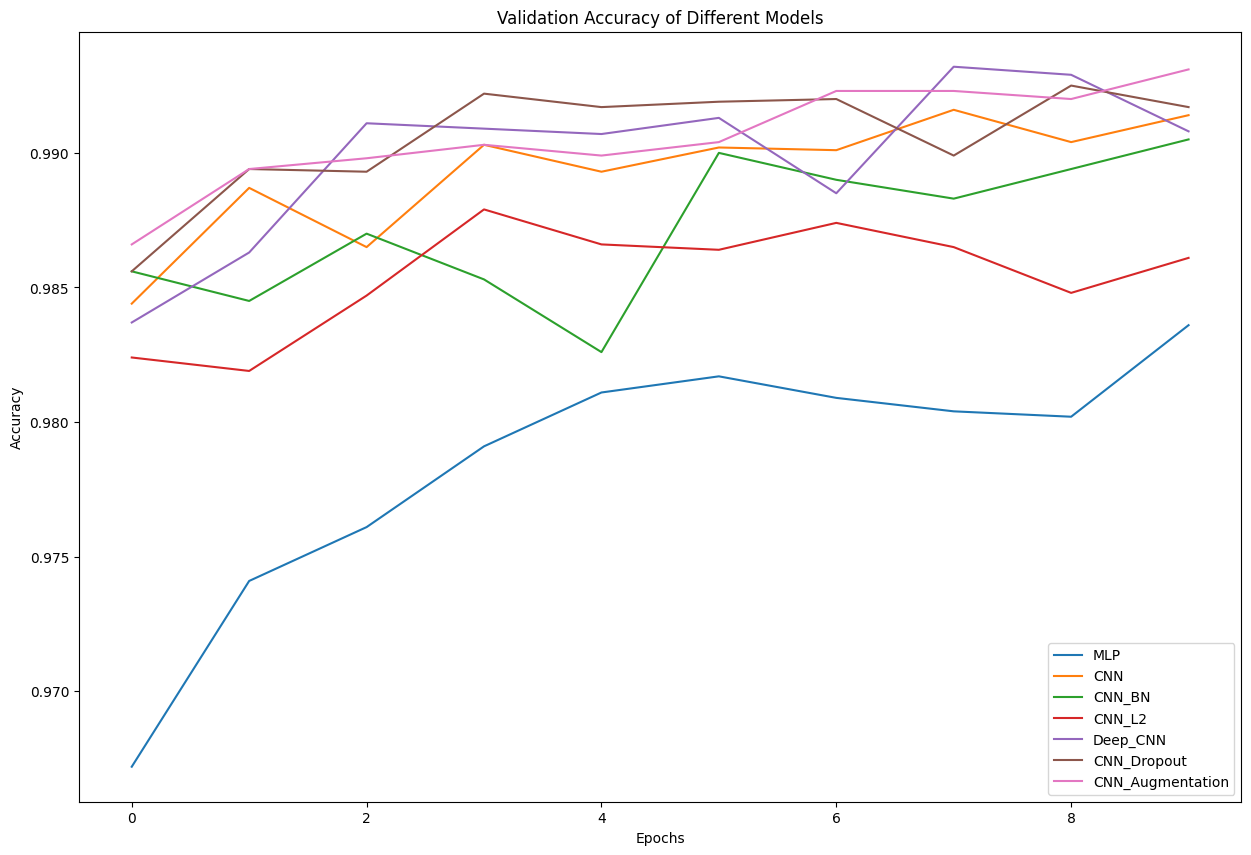

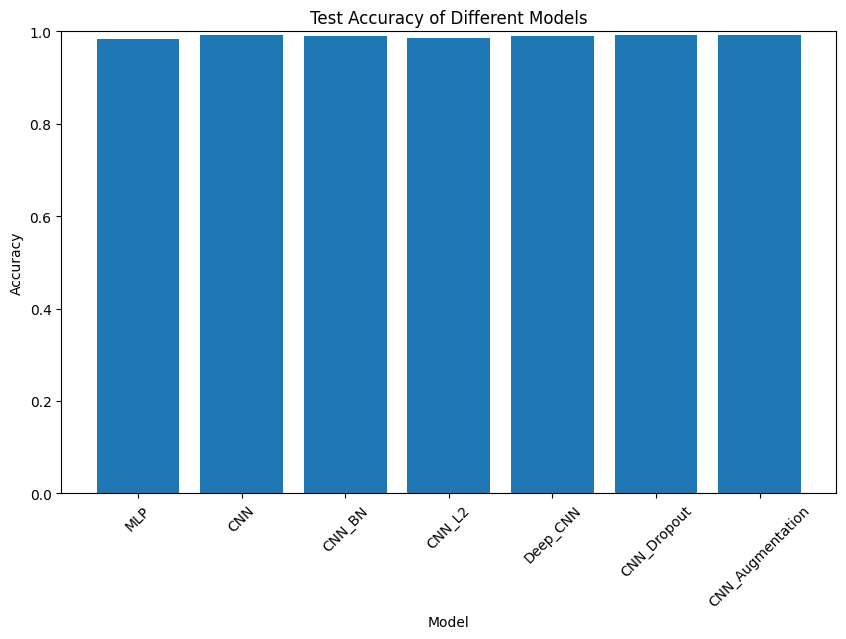

In [10]:
import matplotlib.pyplot as plt

# Evaluate each model
models = [MLP, CNN, CNN_BN, CNN_L2, Deep_CNN, CNN_Dropout, CNN_Augmentation]
model_names = ["MLP", "CNN", "CNN_BN", "CNN_L2", "Deep_CNN", "CNN_Dropout", "CNN_Augmentation"]
test_accuracies = []

for model, name in zip(models, model_names):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'Test accuracy for {name}:', test_acc)
    test_accuracies.append(test_acc)

# Plot training history
plt.figure(figsize=(15, 10))

for history, name in zip([MLP_history, CNN_history, CNN_BN_history, CNN_L2_history, Deep_CNN_history, CNN_Dropout_history, CNN_Augmentation_history], model_names):
    plt.plot(history.history['val_accuracy'], label=name)

plt.title('Validation Accuracy of Different Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Bar plot of test accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies)
plt.title('Test Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()

313/313 [==============================] - 1s 2ms/step


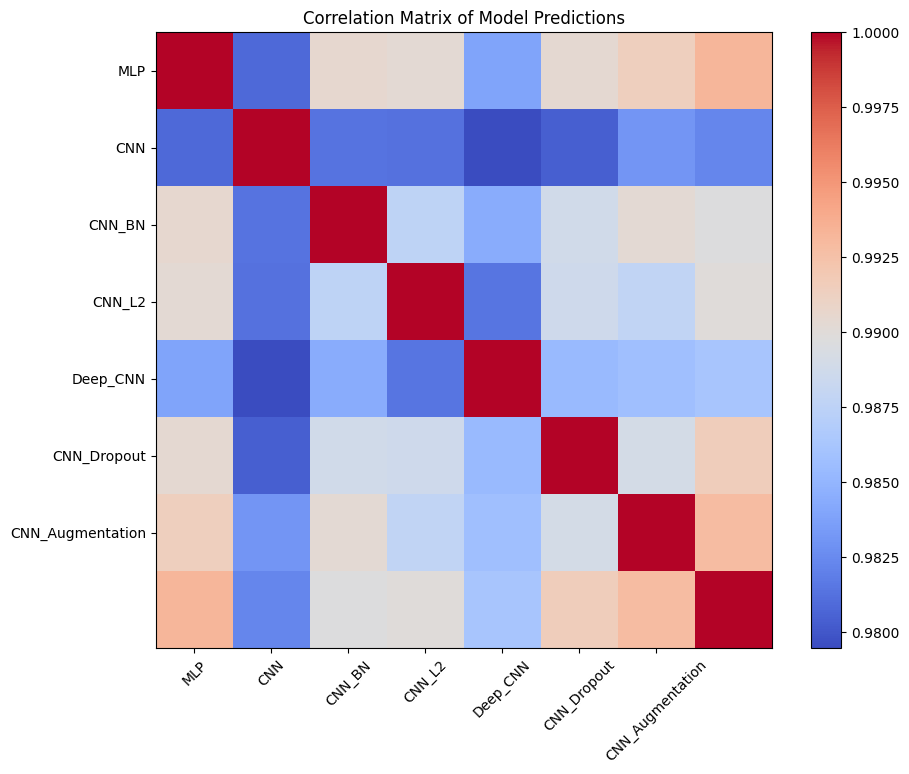

Correlation Matrix:
                  True Labels       MLP       CNN    CNN_BN    CNN_L2  \
True Labels          1.000000  0.980871  0.990454  0.990277  0.983908   
MLP                  0.980871  1.000000  0.981366  0.981305  0.979463   
CNN                  0.990454  0.981366  1.000000  0.987576  0.984416   
CNN_BN               0.990277  0.981305  0.987576  1.000000  0.981442   
CNN_L2               0.983908  0.979463  0.984416  0.981442  1.000000   
Deep_CNN             0.990333  0.980409  0.988786  0.988631  0.985389   
CNN_Dropout          0.991362  0.983098  0.990224  0.987771  0.985769   
CNN_Augmentation     0.993233  0.982282  0.989728  0.989944  0.986232   

                  Deep_CNN  CNN_Dropout  CNN_Augmentation  
True Labels       0.990333     0.991362          0.993233  
MLP               0.980409     0.983098          0.982282  
CNN               0.988786     0.990224          0.989728  
CNN_BN            0.988631     0.987771          0.989944  
CNN_L2            0.98

In [11]:
import numpy as np
import pandas as pd

# Get predictions for each model
predictions = []

for model, name in zip(models, model_names):
    pred = np.argmax(model.predict(test_images), axis=1)
    predictions.append(pred)

# Create a DataFrame to store predictions
df = pd.DataFrame({"True Labels": test_labels})

for name, pred in zip(model_names, predictions):
    df[name] = pred

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(model_names)), model_names, rotation=45)
plt.yticks(np.arange(len(model_names)), model_names)
plt.title('Correlation Matrix of Model Predictions')
plt.show()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each model
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, pred in zip(model_names, predictions):
    accuracy = accuracy_score(test_labels, pred)
    precision = precision_score(test_labels, pred, average='macro')
    recall = recall_score(test_labels, pred, average='macro')
    f1 = f1_score(test_labels, pred, average='macro')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Print the metrics
print(metrics_df)

              Model  Accuracy  Precision    Recall  F1 Score
0               MLP    0.9836   0.983638  0.983440  0.983509
1               CNN    0.9914   0.991414  0.991231  0.991315
2            CNN_BN    0.9905   0.990402  0.990508  0.990444
3            CNN_L2    0.9861   0.985919  0.985999  0.985884
4          Deep_CNN    0.9908   0.990752  0.990771  0.990750
5       CNN_Dropout    0.9917   0.991740  0.991585  0.991647
6  CNN_Augmentation    0.9931   0.993083  0.993057  0.993057


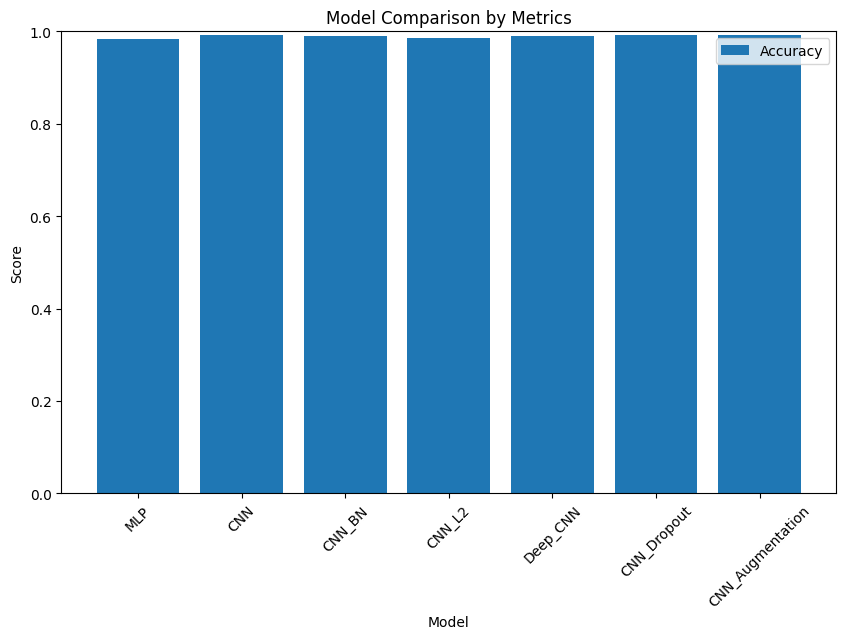

In [14]:
# Visualize the metrics
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, label='Accuracy')
plt.title('Model Comparison by Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.show()

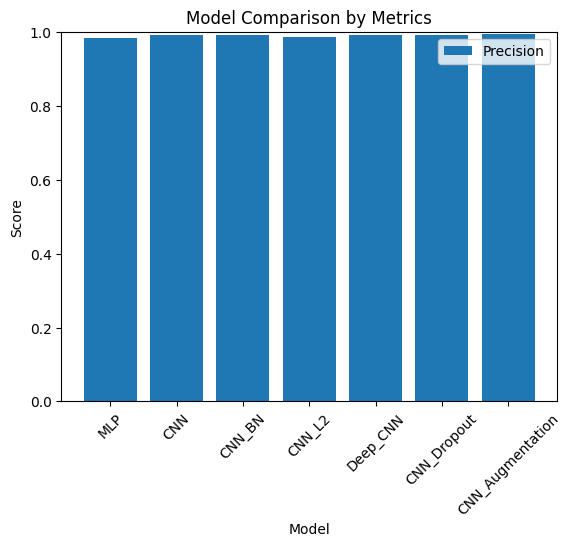

In [15]:
plt.bar(model_names, precision_scores, label='Precision')
plt.title('Model Comparison by Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.show()

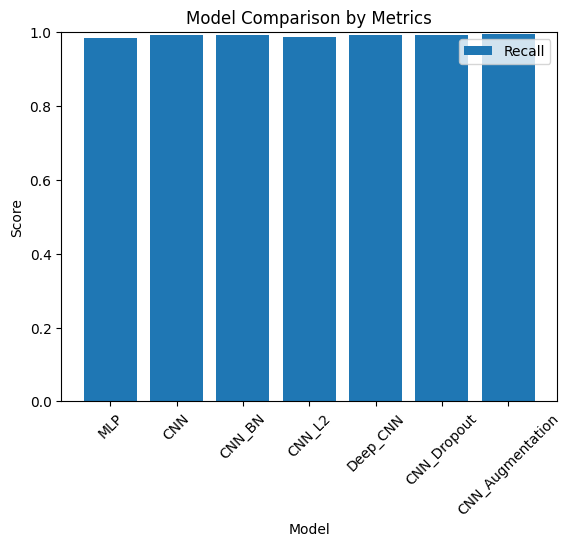

In [16]:
plt.bar(model_names, recall_scores, label='Recall')
plt.title('Model Comparison by Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.show()

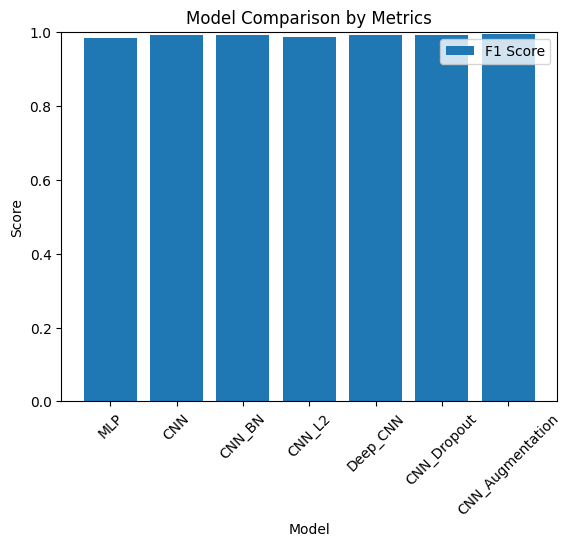

In [17]:
plt.bar(model_names, f1_scores, label='F1 Score')
plt.title('Model Comparison by Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.show()